# 🧪 Activity: Applying One-Way ANOVA to Real Data (Iris Dataset)

## 🎯 Learning Objectives

By the end of this activity, you will be able to:

- Use Python to load and explore a real-world dataset.
- Apply one-way ANOVA to determine if a numeric variable differs significantly between groups.
- Interpret statistical outputs to inform experimental conclusions.

---

## 🧠 Scenario

> Does the **petal length** vary significantly between different **species** of iris flowers?

This scenario is ideal for a **one-way ANOVA**:

- **Factor (independent variable):** Species (Setosa, Versicolor, Virginica)
- **Response (dependent variable):** Petal Length (continuous)

---

## 📦 Step 1: Load Required Libraries




In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


### 📘 Step 2: Load and Preview the Iris Dataset


In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 📈 Step 3: Visualize Petal Length by Species

Let's visualize Petal length by species using **Box Plot**. Box plot is helpful to show the following distribution and spread of a set of numerical data.
1. **The Median (The Line Inside the Box):** The median is the middle value of the data.
2. **The Box (The Interquartile Range - IQR):** The box itself represents the middle 50% of our data.
3. **The Whiskers (The "Normal" Range of Data):** The lines extending from the top and bottom of the box are the "whiskers." They show the range of the data outside of the middle 50%.
4. **The Outliers (The Dots):** Any individual data points that fall outside the range of the whiskers.

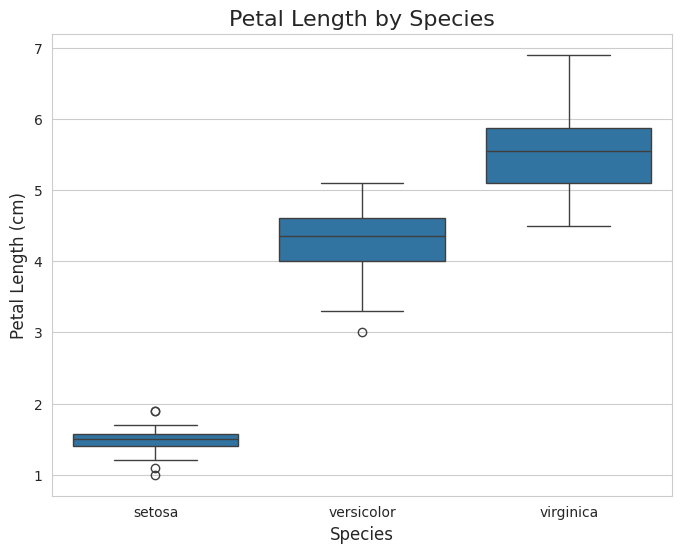

In [4]:
# --- Seaborn Box Plot ---

# Set the style for a nicer look
sns.set_style("whitegrid")

# Create a figure and axes object
plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(x='species', y='petal_length', data=df)

# Add titles and labels for clarity
plt.title('Petal Length by Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)

# Show the plot
plt.show()

By putting the three box plots side-by-side, we can easily compare the distributions of petal lengths across the three species:
- **Separation:** There is a clear separation between the species. The entire range of setosa (including outliers) does not overlap with the range of versicolor or virginica.
- **Variability:** The setosa box and whiskers are very short, meaning its petal lengths are very consistent. versicolor is also fairly consistent. virginica, however, has the tallest box and the longest whiskers, indicating that its petal lengths are the most variable of the three species.
- **Classification:** This plot strongly suggests that petal_length is an excellent feature for building a machine learning model to classify these iris species. If we find a flower with a petal length of 2.0 cm, we can be almost certain it's a setosa. If it's 6.0 cm, it's almost certainly a virginica.




### 🧪 Step 4: Perform One-Way ANOVA

We have following species of flower
1. setosa
2. versicolor
3. virginica

We would like to compare the means of these groups using ANOVA stats. Following keys points about ANOVA stats
1. **F-statistic:** The "Ratio of How Different vs. How Similar"
 - **A large F-statistic means:** The variance between the groups is much larger than the variance within the groups.
 - **A small F-statistic (close to 1) means:** The variance between the groups is roughly the same size as the variance within the groups.
2. **p-value:** The "Probability of our F-statistic (or more extreme)"
  - **A low p-value (e.g., < 0.05) means:** The probability of getting an F-statistic by random chance is practically zero.
  - **A high p-value (e.g., > 0.05) means:** It is quite likely that we could get an F-statistic of this size just by random chance, even if the groups were identical.


In [6]:
# Group the data by species
setosa = df[df['species'] == 'setosa']['petal_length']
versicolor = df[df['species'] == 'versicolor']['petal_length']
virginica = df[df['species'] == 'virginica']['petal_length']

# Perform the ANOVA test
f_stat, p_value_anova = stats.f_oneway(setosa, versicolor, virginica)

print("F-statistic:", f_stat)
print("p_value_anova:", p_value_anova)
if p_value_anova < 0.05:
    print("There is a significant difference among the groups (setosa, versicolor, virginica).")
else:
    print("No significant difference found among the groups.")

F-statistic: 1180.1611822529785
p_value_anova: 2.8567766109619814e-91
There is a significant difference among the groups (setosa, versicolor, virginica).




## 🧠 Step 5: Interpretation Questions

Answer the following in the markdown cells below:

Q1. **What is the null hypothesis for this test?**

Ans. The "boring" hypothesis that there is no difference between these groups.
```
μ_setosa = μ_versicolor = μ_virginica
```

Q2. **What is the alternative hypothesis?**

Ans. The "interesting" hypothesis that a difference exists.

Q3. **Based on the p-value, do you reject or fail to reject the null hypothesis at α = 0.05?**

Ans. We have following stats based on ANOVA
```
F-statistic: 1180.1611822529785
p_value_anova: 2.8567766109619814e-91
```
- We have large value for `F-statistic` and very small value for `p_value_anova`
- It tells us that if the null hypothesis were true, the probability of seeing differences as large as the ones in our data is practically zero.
- Therefore, we have enough evidence to **reject the null hypothesis**.

Q4. **What does this result imply about the petal lengths of the three iris species?**

Ans. The test results provide strong evidence that the three iris species — `setosa`, `versicolor`, and `virginica`, do not have the same average petal length.

It also tells us that the differences in petal length we see in the box plot are real and not just a result of random chance.

We can conclude that the species of an iris flower is a very strong predictor of its petal length.


Q5. **How could this insight inform a classification algorithm?**

Ans. We can confidently include petal_length as a primary feature in our classification model. We would prioritize it over features that might have shown a weaker relationship (a higher p-value in their own ANOVA test). In a scenario with hundreds of features, this insight helps us to discard irrelevant ones, leading to a simpler and often more robust model.